In [13]:
!pip3 install pandas matplotlib scikit-learn

import pandas as pd

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [14]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')


NameError: name 'plt' is not defined

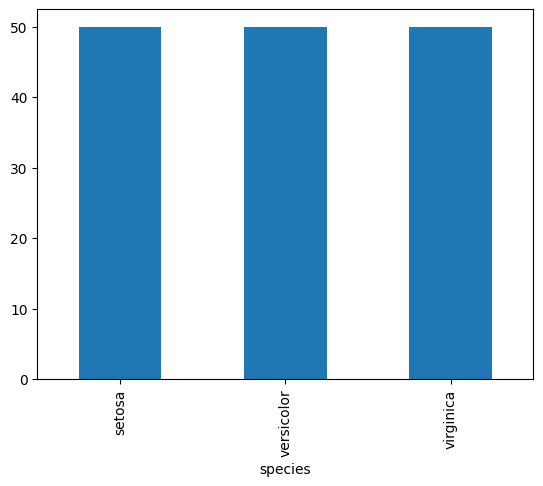

In [15]:
iris['species'].value_counts().plot.bar()
plt.title('Balanced targets')
plt.ylabel('Prevalence')
plt.grid()
plt.savefig('balanced.jpg')

In [71]:
def get_proportions(num_cats):
    import numpy.random as random
    import numpy as np
    nums = [random.random() for x in range(num_cats)]
    summed = np.sum(nums)
    return [x/summed for x in nums]

In [72]:
get_proportions(3)

[0.4102251325222409, 0.49819412963061294, 0.09158073784714617]

In [87]:

def imbalance_dataset(df, target):
    pds = []
    df_len = len(df)
    unique_cats = iris[target].unique()
    proportions = get_proportions(len(unique_cats))
    print(proportions)
    for i, val in enumerate(unique_cats):
        print(val)
        spec = df[df[target] == val]
        spec_len = len(spec)
        #print(f' getting for {val} {round(df_len*proportions[i])} points')
        resultant_pdf = spec.sample(frac=1).head(round(spec_len*proportions[i]))
        print(len(resultant_pdf))
        pds.append(resultant_pdf)
    return pd.concat(pds)



In [88]:
df = imbalance_dataset(iris, 'species')

[0.46769222399022103, 0.2588660557223937, 0.2734417202873854]
setosa
23
versicolor
13
virginica
14


In [89]:
df['species'].value_counts()

species
setosa        23
virginica     14
versicolor    13
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x14b95e820>,
 [Text(0.3, 0, 'setosa'), Text(0.45, 0, 'setosa'), Text(0.5, 0, 'setosa')])

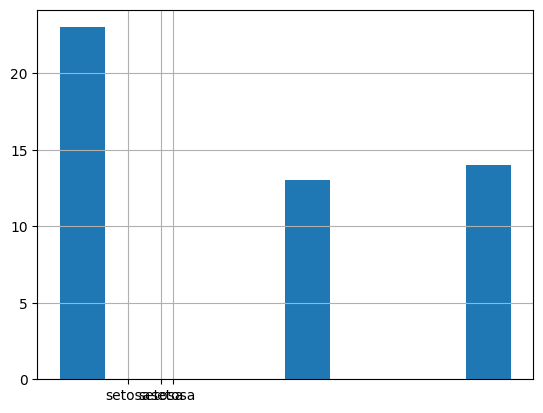

In [112]:
import matplotlib.pyplot as plt
df['species'].hist()
plt.xticks([0.3,0.45,0.5])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

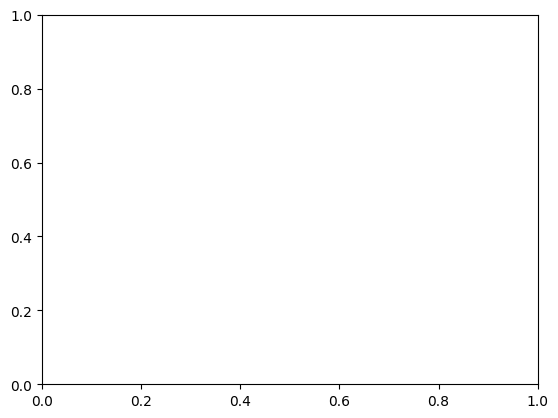

In [111]:
plt.xticks()